In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Discrete Random Variable and Probability Mass Distributions

# 1. Binomial Distributions

- https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:
from scipy.stats import binom # binomial distribution from scipy

- Parameters

In [3]:
n = 100 # 100 numbers of trials
p = 0.5 # a fair coin : probability for success (head) is equal to probability for failture (tail).

## Calculating Descriptive Statistics

1. m = mean
2. v = variance
3. s = skewness
4. k = kurtosis

In [4]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [5]:
print(mean, var, skew, kurt)

50.0 25.0 0.0 -0.02


## Visualizing Binomial Distributions

- specifying the x range to plot: x = the number of successes among n trials

In [6]:
x = np.arange(0, 100, 1)

In [7]:
rv = binom(n, p) # random variable satisfying binomial distributions

- y is the probability to have x successes among n trials

In [8]:
y = rv.pmf(x) # pmf = Probability Mass Function

In [9]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

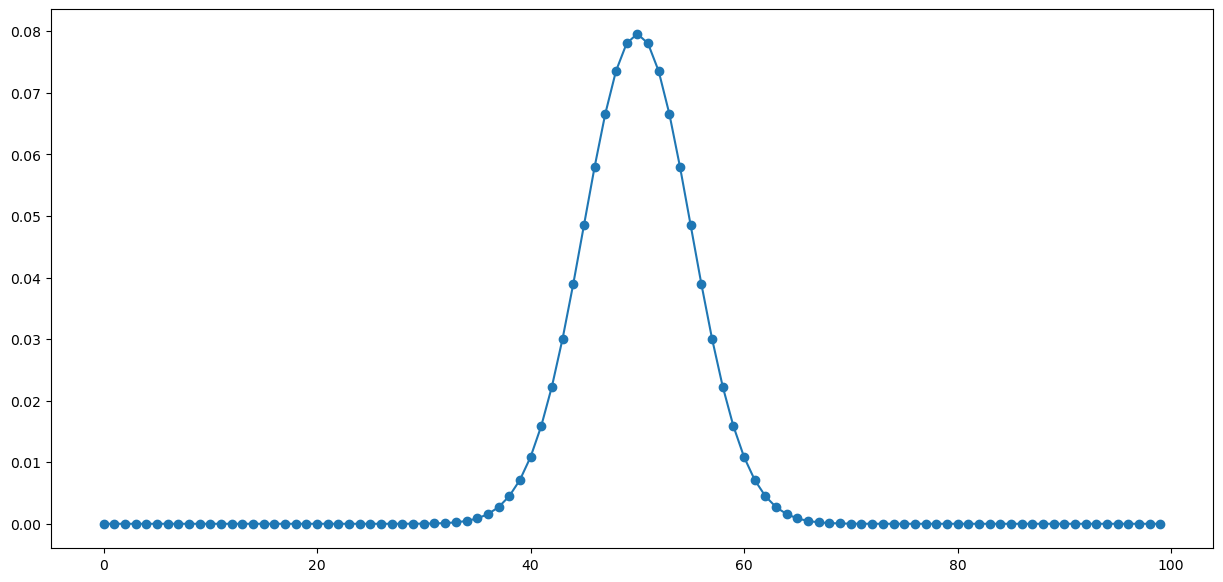

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, marker='o')
plt.show()

- Let us change n and p, for example, unfair coin.

In [11]:
n = 50
p = 0.9

In [12]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [13]:
print(mean, var, skew, kurt)

45.0 4.499999999999999 -0.3771236166328254 0.10222222222222226


In [14]:
x = np.arange(0, 51, 1)
rv = binom(n, p)
y = rv.pmf(x)

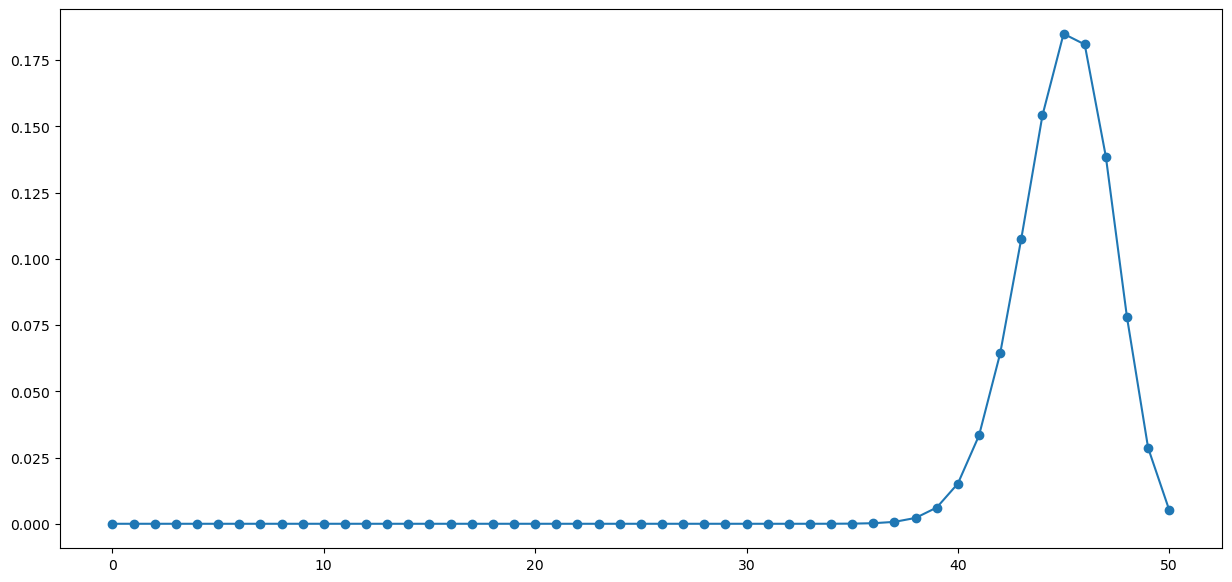

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, marker='o')
plt.show()

# Continuous Random Variables and Probability Density Distributions

# 1. Normal distribution

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
- We need to specify two parameters for normal distributions : $\mu$ and $\sigma$
- scipy.stats.norm is by default given by "standard" normal distribution, which means $\mu=0$ and $\sigma=1$.
- If you want to use "non-standard" normal distributions, we need to specify loc ($\mu$) and scale ($\sigma$).

In [16]:
from scipy.stats import norm

In [17]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [18]:
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


In [19]:
mean, var, skew, kurt = norm.stats(loc=3, scale=2, moments='mvsk')

In [20]:
print(mean, var, skew, kurt)

3.0 4.0 0.0 0.0


In [21]:
x = np.arange(-8, 8, 0.1)

In [22]:
rv1 = norm(loc=0,  scale=1.0)   # Standard 
rv2 = norm(loc=3,  scale=2.0)   # Non-standard : less sharper than standard
rv3 = norm(loc=-2, scale=0.5)   # Non-standard : sharper than standard

In [23]:
y1 = rv1.pdf(x) # pdf = probability density function
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

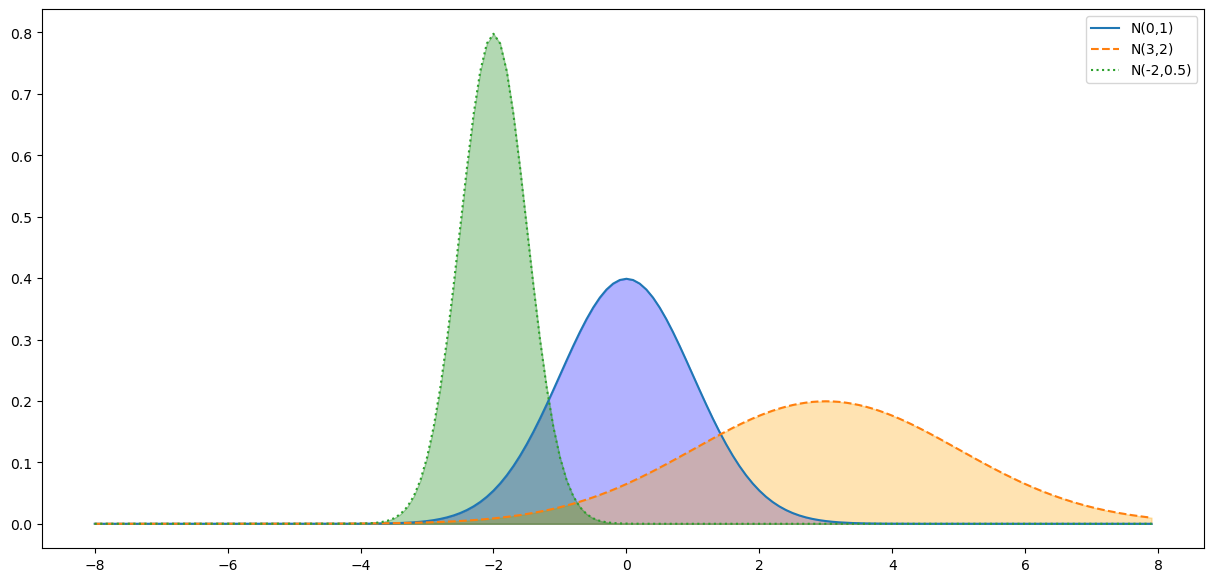

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y1, label="N(0,1)", linestyle='solid')
ax.plot(x, y2, label="N(3,2)", linestyle='dashed')
ax.plot(x, y3, label="N(-2,0.5)", linestyle='dotted')
ax.fill_between(x, y1, color="blue",   alpha=0.3)
ax.fill_between(x, y2, color="orange", alpha=0.3)
ax.fill_between(x, y3, color="green",  alpha=0.3)
ax.legend()
plt.show()

## Calculating Percentils or equivalently z-critical values

- Let us begin with non-standard normal distribution $N(3,0.5)$, which means $\mu=3$ and $\sigma=0.5$.
- Somebody asks you to calculate 95 percentile of this normal distribution. 
- How can we calculate 95 percentile by using Python?
- Similarly we can calculate z critical value with $\alpha = 0.05$, $z_{0.05}$.

## 1) You can calculate percentiles directly by using given normal distribution.

In [25]:
rv = norm(loc=3, scale=0.5)

In [26]:
perct  = rv.ppf(0.95)
perct1 = rv.ppf(0.90)

In [27]:
print(perct)

3.822426813475736


In [28]:
x = np.arange(-5, 5, 0.01)
y = rv.pdf(x)

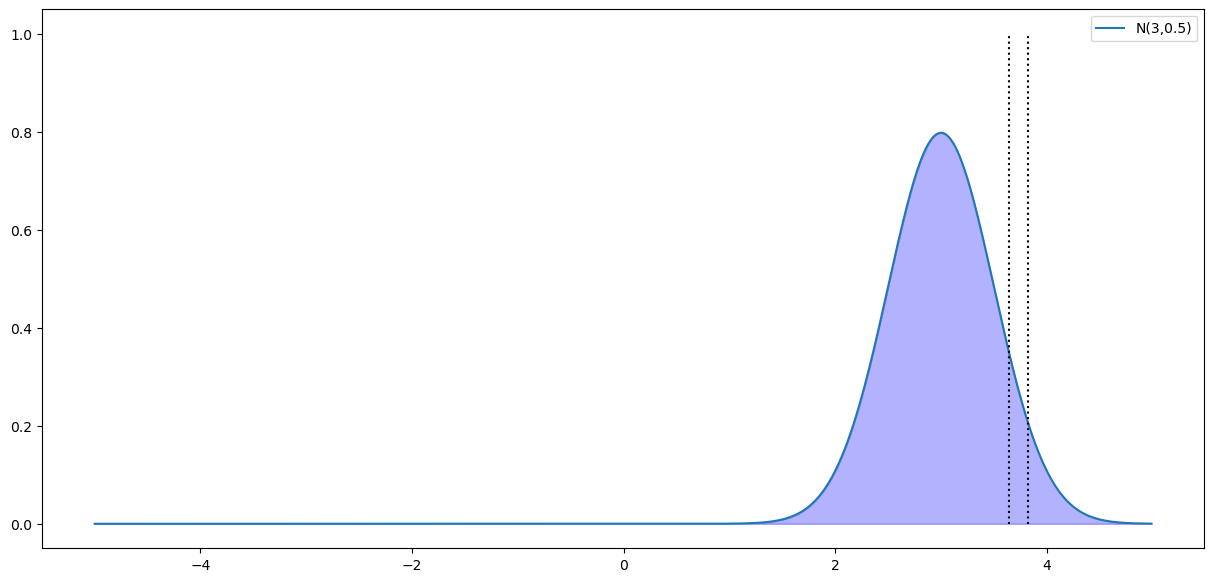

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, label="N(3,0.5)", linestyle='solid')
ax.fill_between(x, y, color="blue",   alpha=0.3)
ax.plot([perct,perct],   [0,1], linestyle=":", color="black") # 95 percentile line
ax.plot([perct1,perct1], [0,1], linestyle=":", color="black") # 90 percentile line
ax.legend()
plt.show()

In [30]:
x1 = np.arange(0, perct, 0.01)
x2 = np.arange(perct, 5, 0.01)

In [31]:
y1 = rv.pdf(x1)
y2 = rv.pdf(x2)

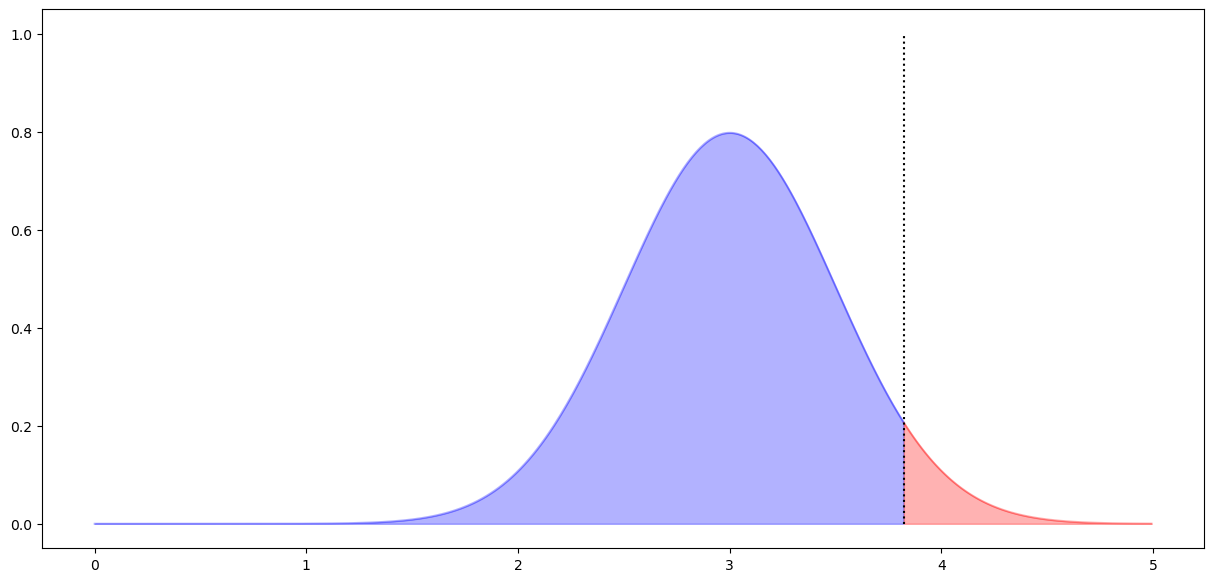

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x1, y1, color="blue", alpha=0.3)
ax.fill_between(x1, y1, color="blue",   alpha=0.3)
ax.plot(x2, y2, color="red", alpha=0.3)
ax.fill_between(x2, y2, color="red", alpha=0.3)
ax.plot([perct,perct],   [0,1], linestyle=":", color="black") # 95 percentile line
plt.show()

# 2) You can calculate percentiles by using standard normal distributions

- Transformation between given normal distribution and standard normal one
- You can use standard normal distribution tables or information

In [33]:
rv = norm(loc=0, scale=1) # Standard normal distrbition
perct = rv.ppf(0.95)
print(perct)

1.6448536269514722


- but this is NOT a 95 percentile of given normal distribution N(3,0.5)
- So we need to transform 95 percentile of standard normal distribution to that of given normal distribution.
- How to do? Using transformation between normal distributions as we learned in the lecture. 
- $z = \frac{x-\mu}{\sigma} \leftrightarrow x = \sigma\times z+\mu$ 

In [34]:
perct * 0.5 + 3

3.822426813475736

- We confirm that the calculation result based on standard normal distribution and transformation is exactly the same with the direct calculation. 

## Calculating area by using given boundaries

### Q1. Using $z=2.33$ as a upper bound, calculate an area from $-\infty$ to the upper bound. 

- Answer : Use cdf method associated with the random variable or the distribution. 
- cdf(x) gives you an area from $-\infty$ to the given number x. 

In [35]:
from scipy.stats import norm

In [36]:
rv = norm(loc=0.0, scale=1.0)

In [37]:
rv.cdf(0.0)

0.5

In [38]:
rv.cdf(2.33)

0.9900969244408357

- We confirm that the area from $-\infty$ to 2.33 is about 0.99.
- In fact, 2.33 is approximatly 99 percentile of the standard normal distribution.

In [39]:
rv.ppf(0.99)

2.3263478740408408

## Q2. Calculate an area from -1.5 to 1.0

- Use cdf method, but this time we can use cdf twice.

1. cdf(-1.5) = area from $-\infty$ to -1.5
2. cdf(1.0)  = area from $-\infty$ to  1.0
3. cdf(1.0) - cdf(-1.5) = the area from -1.5 to 1.0

In [40]:
area1 = rv.cdf(-1.5)
area2 = rv.cdf(1.0)
area2 - area1

0.7745375447996848

In [41]:
x  = np.arange(-5, 5, 0.1)
x1 = np.arange(-5, -1.5, 0.1)
x2 = np.arange(-5,  1.0, 0.1)

y  = rv.pdf(x)
y1 = rv.pdf(x1)
y2 = rv.pdf(x2)

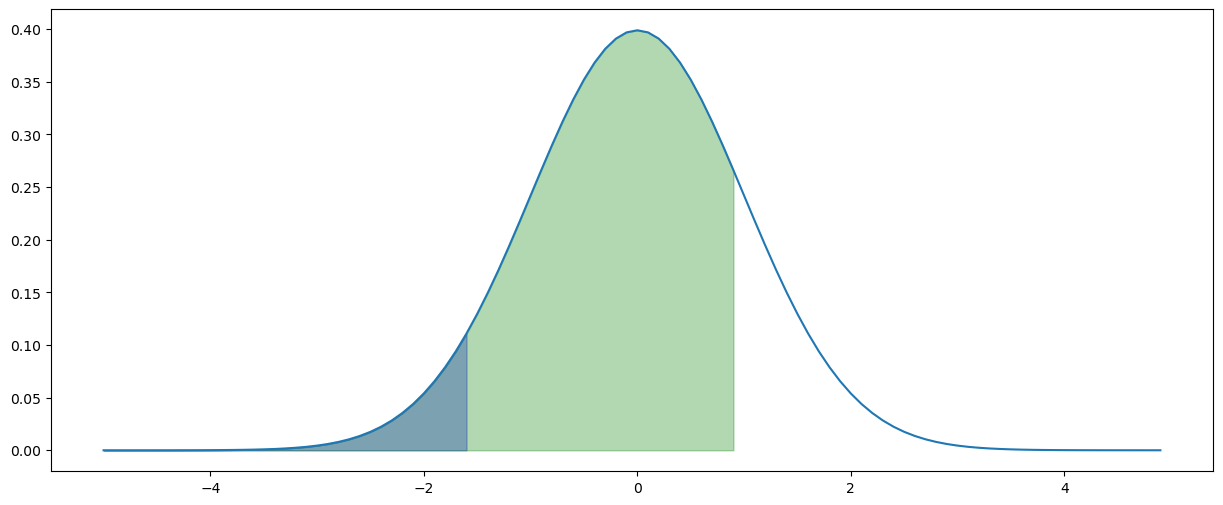

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
ax.plot(x, y)
ax.fill_between(x1, y1, color="blue", alpha=0.3)
ax.fill_between(x2, y2, color="green", alpha=0.3)
plt.show()

# 2. (Student's) t distribution

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
- We can specify three parameters: degree of freedom ($\nu$, df), location (loc), scale (scale)
- $y = \frac{x-loc}{scale}$
- With df, loc, scale, t distribution is defined as t(y, df)/scale. 
- If you use loc=0 and scale=1, the defined t distribution is the same as t distribution that we learned in the lecture. 
- By changing loc, we can shift up or down your t distribution along x axis. 
- By changing scale, we can make your t distribution less sharper or sharper. 
- Default values of loc and scale are 0 and 1, resepctively. 

In [44]:
from scipy.stats import t
from scipy.stats import norm

In [47]:
mean, var, skew, kurt = t.stats(df=5, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = t.stats(df=10, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = t.stats(df=30, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = t.stats(df=100, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = t.stats(df=1000, moments='mvsk')
print(mean, var, skew, kurt)

0.0 1.6666666666666667 0.0 6.0
0.0 1.25 0.0 1.0
0.0 1.0714285714285714 0.0 0.23076923076923078
0.0 1.0204081632653061 0.0 0.0625
0.0 1.002004008016032 0.0 0.006024096385542169


In [48]:
rv1 = t(df=5)
rv2 = t(df=15)
rv3 = t(df=1000)
rv  = norm(loc=0, scale=1)

In [49]:
x  = np.arange(-5, 5, 0.1)
y  = rv.pdf(x)
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

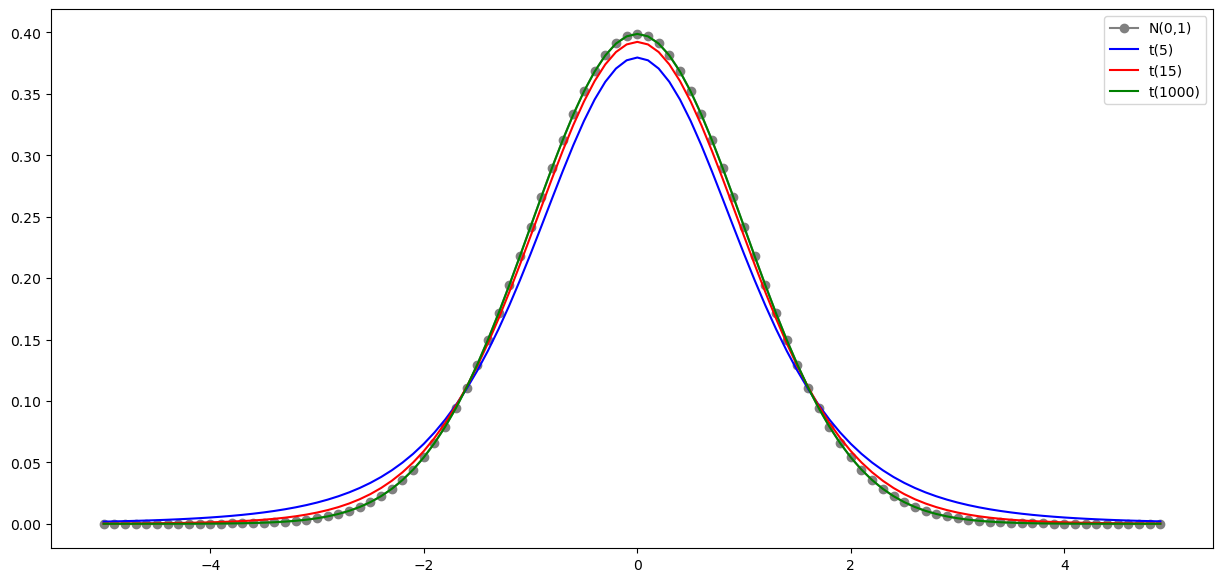

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.plot(x,  y,  color="gray",  label="N(0,1)", marker='o')
ax.plot(x, y1, color="blue",  label="t(5)")
ax.plot(x, y2, color="red",   label="t(15)")
ax.plot(x, y3, color="green", label="t(1000)")
ax.legend()
plt.show()

In [60]:
rv  = t(df=10, loc=1.0, scale=0.5)
rv1 = t(df=10, loc=0.0, scale=1.0)

In [61]:
x  = np.arange(-5, 5, 0.1)
y  = rv.pdf(x)
y1 = rv1.pdf(x)

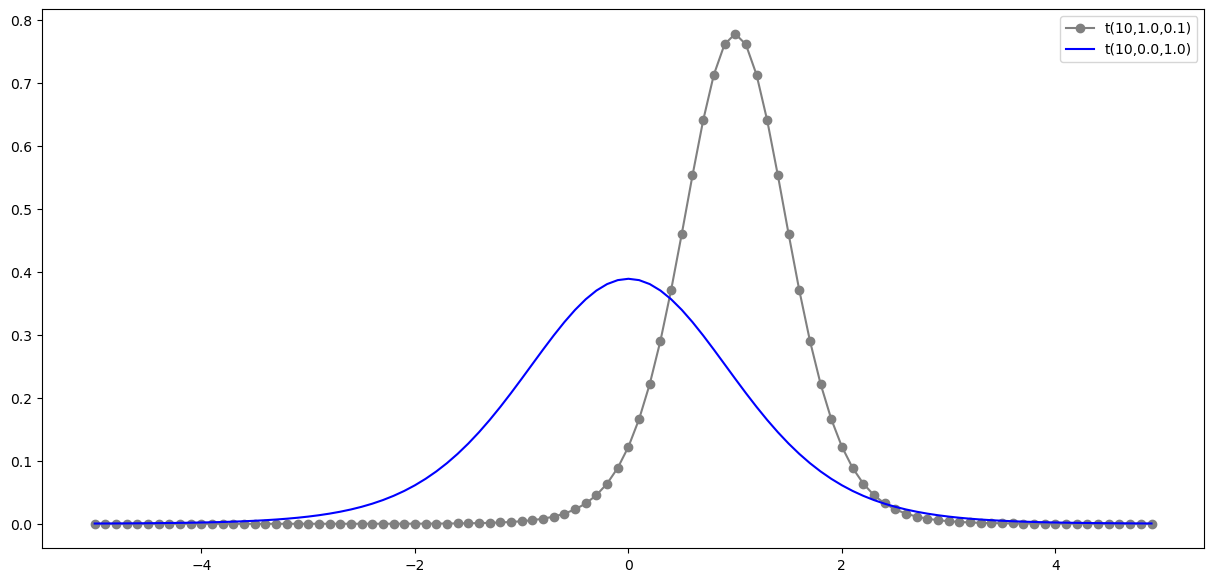

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.plot(x,  y,  color="gray",  label="t(10,1.0,0.1)", marker='o')
ax.plot(x, y1, color="blue",   label="t(10,0.0,1.0)")
ax.legend()
plt.show()

## Percentiles of t distribution

In [63]:
rv = t(df=10)

In [64]:
perct = rv.ppf(0.95) # 95 percentile of t distribution
print(perct)

1.8124611228107335


In [65]:
x1 = np.arange(-5, perct, 0.1)
x2 = np.arange(perct, 5,  0.1)

y1 = rv.pdf(x1)
y2 = rv.pdf(x2)

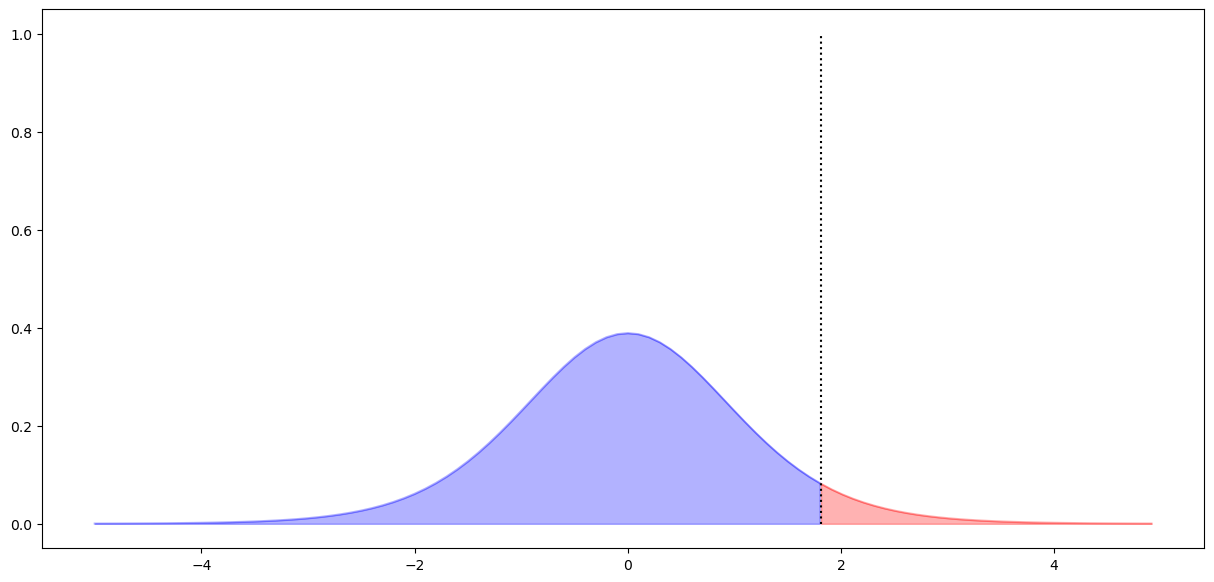

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x1, y1, color="blue", alpha=0.3)
ax.fill_between(x1, y1, color="blue",   alpha=0.3)
ax.plot(x2, y2, color="red", alpha=0.3)
ax.fill_between(x2, y2, color="red", alpha=0.3)
ax.plot([perct,perct],   [0,1], linestyle=":", color="black") # 95 percentile line
plt.show()

## Calculate Area of t distribution

- Use cdf methods

In [67]:
rv.cdf(1.0)

0.82955343384897

- Normal and t distributions are related to estimation of Population Means in inferential statistics. 
- Chi-squared distribution and F-distribution are related to estimation of population variances in inferential statistics. 

# 3. Chi-Squared Distribution

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

In [68]:
from scipy.stats import chi2

In [70]:
mean, var, skew, kurt = chi2.stats(df=5, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = chi2.stats(df=10, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = chi2.stats(df=30, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = chi2.stats(df=100, moments='mvsk')
print(mean, var, skew, kurt)

5.0 10.0 1.2649110640673518 2.4
10.0 20.0 0.8944271909999159 1.2
30.0 60.0 0.5163977794943222 0.4
100.0 200.0 0.282842712474619 0.12


In [71]:
rv1 = chi2(df=5)
rv2 = chi2(df=10)
rv3 = chi2(df=30)

In [74]:
x = np.arange(0, 50, 0.1)
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

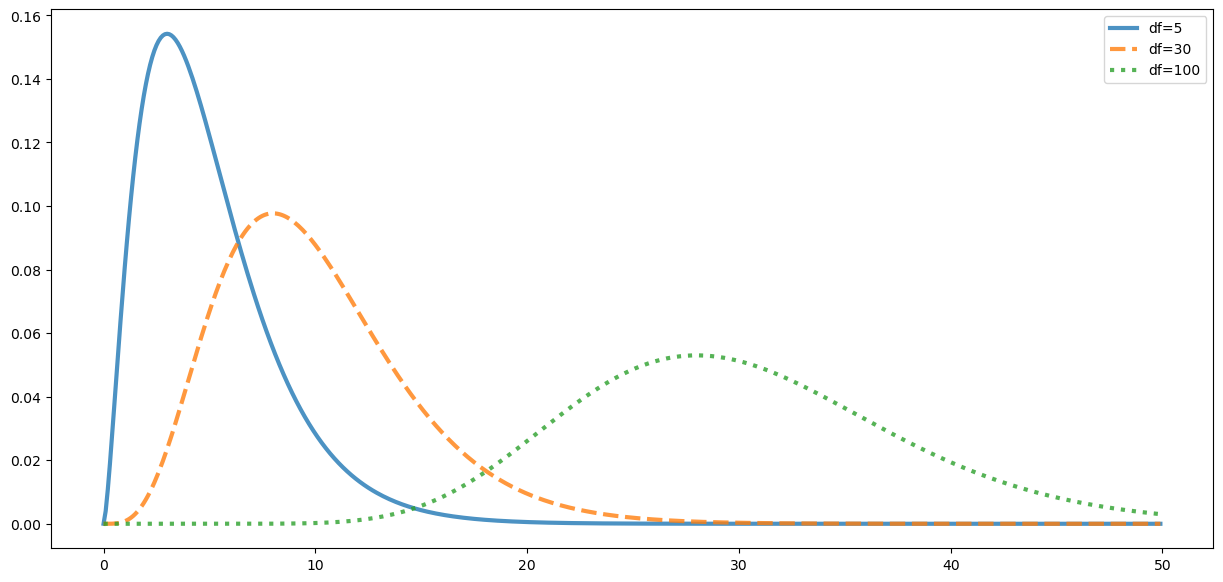

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y1, lw=3, alpha=0.8, ls="-",  label="df=5") 
ax.plot(x, y2, lw=3, alpha=0.8, ls="--", label="df=30") 
ax.plot(x, y3, lw=3, alpha=0.8, ls=":",  label="df=100")
ax.legend()
plt.show()

# 4. F distribution

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f
- F distribution requires two degrees of freedom, dfn and dfd.

In [76]:
from scipy.stats import f

In [79]:
mean, var, skew, kurt = f.stats(dfn=20, dfd=30, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = f.stats(dfn=20, dfd=50, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = f.stats(dfn=20, dfd=100, moments='mvsk')
print(mean, var, skew, kurt)

mean, var, skew, kurt = f.stats(dfn=50, dfd=30, moments='mvsk')
print(mean, var, skew, kurt)

1.0714285714285714 0.2119309262166405 1.3188448930226224 3.391666666666668
1.0416666666666667 0.16040157004830918 1.0403619279733716 1.9865546218487398
1.0204081632653061 0.1279848674163543 0.8374826938561394 1.2053716740619955
1.0714285714285714 0.1377551020408163 1.2316805742712018 3.0278787878787883


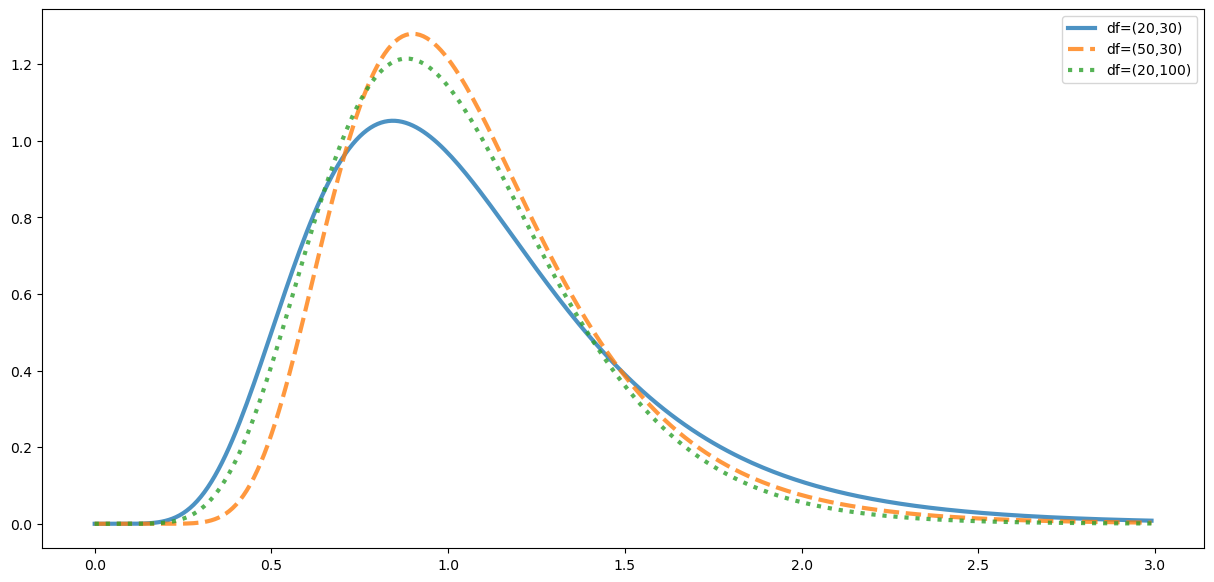

In [80]:
rv1 = f(20, 30)
rv2 = f(50, 30)
rv3 = f(20, 100)


x  = np.arange(0, 3, 0.01) # prepare x points to plot
y1  = rv1.pdf(x)
y2  = rv2.pdf(x)
y3  = rv3.pdf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y1, lw=3, alpha=0.8, ls="-",  label="df=(20,30)") 
ax.plot(x, y2, lw=3, alpha=0.8, ls="--", label="df=(50,30)") 
ax.plot(x, y3, lw=3, alpha=0.8, ls=":",  label="df=(20,100)")
ax.legend()

plt.show()